<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi della curva IV di una resistenza

In questo Colab, facciamo una analisi base dei dati di intensità di corrente che attraversa una resistenza al variare della differenza di potenziale ai capi della resistenza stessa.

In primis, scarichiamo ed installiamo il modulo iminuit che ci servirà per fare i fit ed ottenere la stima del valore della resistenza.

In [1]:
!pip install iminuit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 5.8 MB/s eta 0:00:00


Importiamo i moduli Python necessari e settiamo uno stile grafico con dimensione del font pari a 16.

In [24]:
# Data handling
import numpy as np

# Graphics
import matplotlib.pyplot as plt

# Fit
from iminuit import Minuit
from iminuit.cost import LeastSquares

# Style options
from matplotlib.ticker import FuncFormatter
plt.rc("font", size = 16)

Riportiamo qui le misure effettuate in degli oggetti chiamati "array", o "vettori", di numpy. Abbiamo cura di indicare anche le incertezze sui valori misurati, stimati in base alla sensibilità e tenendo a mente delle unità di misura!

In [21]:
V = np.array([
    1.198, 1.482, 2.30, 3.56, 4.41, 7.17, 17.64
])  # in Volt
V_err = np.array([
    0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01
])  # in Volt
I = np.array([
    120e-6, 150e-6, 230e-6, 360e-6, 450e-6, 700e-6, 1700e-6
])  # in Ampere
I_err = np.array([
    10e-6, 10e-6, 10e-6, 10e-6, 10e-6, 100e-6, 100e-6
])  # in Ampere

Facciamo un primo grafico della curva V vs I.

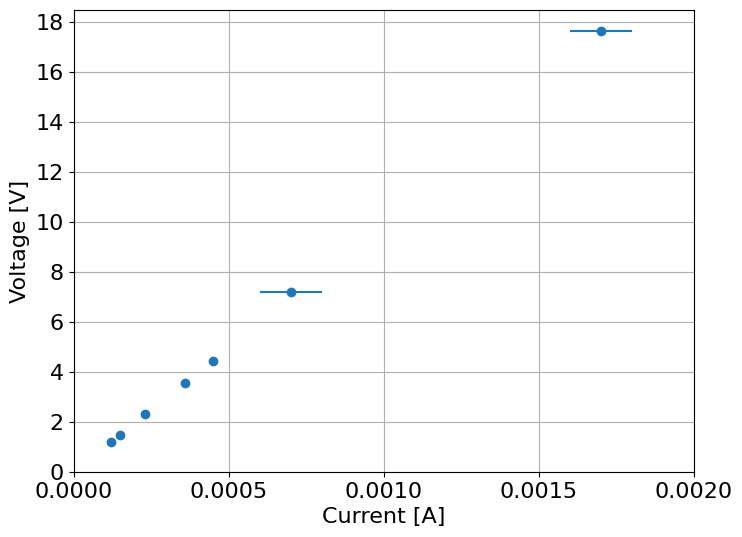

In [50]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(x = I, y = V, xerr = I_err, yerr = V_err, ls = "None", marker = "o", markersize = 6)
ax.set_xlabel("Current [A]")
ax.set_ylabel("Voltage [V]")
ax.set_xlim(left = 0, right = 0.002)
ax.set_xticks([0., 0.00050, 0.00100, 0.00150, 0.00200])
ax.set_yticks(np.arange(0, 20, 2))
ax.grid()

Chiaramente, i primi 5 punti sono presi con un fondoscala dell'amperometro, mentre i restanti 2 sono presi con un altro fondoscala, e pertanto hanno errori maggiori rispetto alle 5 misure di corrente al di sono di 1 mA.

Conviene fare uno zoom sui primi 5 punti a valori di corrente al di sotto di 1 mA.

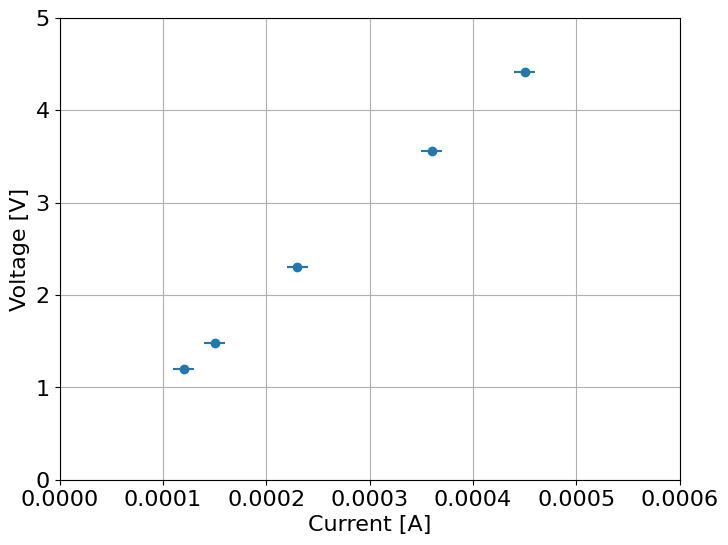

In [52]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(x = I, y = V, xerr = I_err, yerr = V_err, ls = "None", marker = "o", markersize = 6)
ax.set_xlabel("Current [A]")
ax.set_ylabel("Voltage [V]")
ax.set_xlim(left = 0, right = 0.0006)
ax.set_ylim(bottom = 0., top = 5)
ax.set_yticks(np.arange(0, 6, 1))
ax.grid()

Risulta evidente che gli errori più importanti sono quelli sulla corrente!

Dunque, a causa dell'algoritmo di fit che useremo, conviene fare dei grafici in cui sull'asse delle y vi sia la grandezza con l'incertezza maggiore, mentre sull'asse x ci sia la grandezza con l'incertezza minore

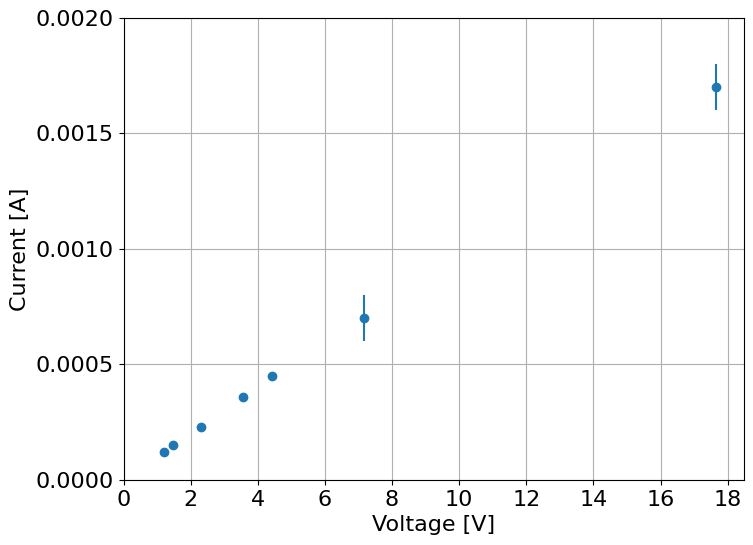

In [55]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(y = I, x = V, yerr = I_err, xerr = V_err, ls = "None", marker = "o", markersize = 6)
ax.set_ylabel("Current [A]")
ax.set_xlabel("Voltage [V]")
ax.set_ylim(bottom = 0, top = 0.002)
ax.set_yticks([0., 0.00050, 0.00100, 0.00150, 0.00200])
ax.set_xticks(np.arange(0, 20, 2))
ax.grid()

Ora dobbiamo definire la funzione di fit. Poichè noi sappiamo che $V=Ri$, $R$ deve essere il coefficiente ottenuto dal rapporto fra le tensioni $V$ e le correnti $i$.

Posso usare la funzione di fit:

$V = a + I / R$

ossia una funzione lineare fra $V$ e $i$ con parametri della retta dati dall'ordinata all'origine $a$ e dal coefficiente angolare dato da $1/R$, in modo tale che il fit mi restituisca direttamente il valore di $R$.

In [56]:
def linear(x, a, R):
  return a + x/R

lsq = LeastSquares(x=V, y=I, yerror=I_err, model = linear)
m = Minuit(lsq, a=0, R=100)  # a=0 e R=100 sono le stime iniziali dei parametri
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.9909 (χ²/ndof = 0.2)     │              Nfcn = 202              │
│ EDM = 0.000112 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1e-6    │   9e-6    │            │            │         │         │       │
│ 1 │ R    │  9.93e3   │  0.31e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────┐
│   │             a             R │
├───┼─────────────────────────────┤
│ a │      8.92e-11 2.59580935e-3 │
│ R │ 2.59580935e-3      9.73e+04 │
└───┴─────────────────────────────┘

Attraverso il fit, abbiamo ottenuto i valori di best-fit per il parametro $a$ e per la resistenza $R$. Questi si possono vedere con:

In [59]:
m.values

<ValueView a=9.766319052911063e-07 R=9928.547841609721>

In [60]:
m.errors

<ErrorView a=9.442062208068892e-06 R=311.97419765807234>

In [68]:
m.fval ## il chi quadrato

0.9908506668031489

In [69]:
m.ndof ## numero di gradi di libertà

5.0

Dunque, il valore di best-fit per la resistenza è $R = 9.9 \pm 0.3\,\text{k}\Omega$.

Il valore vero della resistenza fornito dall'azienda che ha prodotto la resistenza è $R_\text{true} = 10 \,\text{k}\Omega$, ergo la stima da noi trovata è pienamente compatibile con il valore vero entro 1 sigma.

Invece, il valore del parametro $a$ è pienamente compatibile con 0, essendo $a = \left( 1 \pm 9 \right) \times 10^{-6} \,\text{V}$.

Invece, il $\chi^2$ è risultato pari a $1$, mentre il numero di gradi di libertà è pari alla differenza fra il numero di punti del grafico (7) ed il numero di parametri che sono stati stimati dalla procedura di fit (2, ossia a ed R), ergo ndof = 5.

Dunque, $\chi^2/ndof=0.2$.
Il caso ottimale è che questo valore sia prossimo ad 1.
Il fatto che, nel nostro caso, sia un po' minore di 1 implica che le incertezze sulla corrente sono state un po' sovrastimate.

Facciamo un grafico riassuntivo.

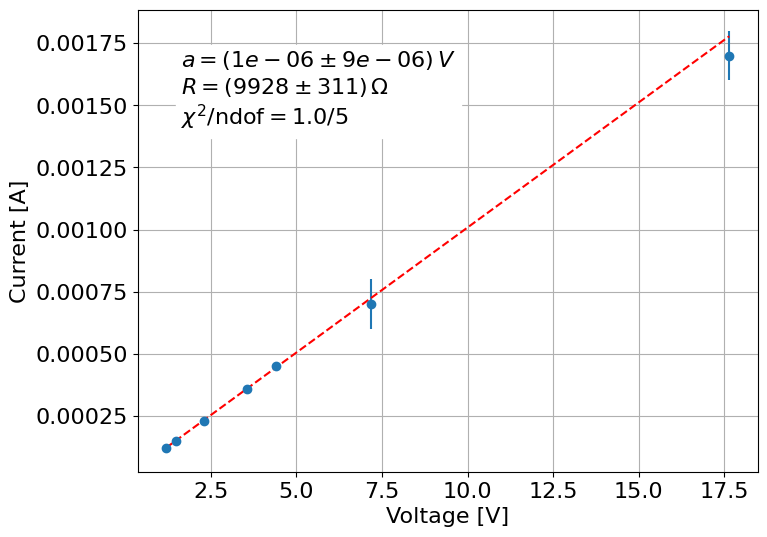

In [70]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(x = V, y = I, yerr = I_err, xerr = V_err, ls = "None", marker = "o", markersize = 6, label = "Data")

x = np.linspace(np.min(V), np.max(V), 100)
ax.plot(x, linear(x, *m.values), color = "red", ls = "dashed", label = "Fit")

ax.text(0.07, 0.75, "$a = (%.0e \pm %.0e)\,V$\n$R = (%d \pm %d)\,\Omega$\n$\chi^{2}/$ndof$ = %.1f/%d$"
        % (m.values[0], m.covariance[0, 0]**0.5, m.values[1], m.covariance[1, 1]**0.5, m.fval, m.ndof),
        transform = ax.transAxes,
        bbox = dict(facecolor = "white", edgecolor = "white"))

ax.set_ylabel("Current [A]")
ax.set_xlabel("Voltage [V]")
ax.grid()

In [ ]:
(m.values[0], m.covariance[0, 0]**0.5, m.values[1], m.covariance[1, 1]**0.5)

(-0.059767784083112896,
 0.001113114408520997,
 10359.145720658096,
 5.837042999103528)

In [ ]:
p0_vals = np.linspace(-2, 2, 50)
p1_vals = np.linspace(1e3, 20e3, 50)
surf = np.zeros((50, 50))

#for i in range(50):
  #for j in range(50):
    #surf[i][]
    #print ("")